In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from fitter import Fitter
# import xlrd
from IPython.display import display, Latex
import os

from matplotlib import pyplot as plt

In [97]:
# Read the data from the Excel file
df : pd.DataFrame = pd.read_excel('data.xls').T
df.reset_index(inplace=True)
df.columns = df.iloc[0]
df = df.drop(df.index[0])
df = df.astype(float)
print(df.columns)

Index(['Interarrival Times', 'Service Times for Initial Phase',
       'Service Times for Placing Keyboard and Mouse',
       'Service Times for Assembling the Case (Aluminum Plates)'],
      dtype='object', name=0)


In [98]:
figure_dir = '../Report/Figures/Distribution Analysis'
for col in df.columns:
    data1 = df[col]
    plt.figure(figsize=(10, 6))
    sns.histplot(data1, color='blue', kde=True, bins=40)
    plt.title(f'Histogram of {col}')
    plt.xlabel(f'{col} (Minutes)')
    plt.ylabel('Frequency')
    file_name = f'histogram_{col.replace(' ', '_').lower()}.png'
    plt.savefig(os.path.join(figure_dir, file_name))
    plt.close()
    plt.show()

Analyzing column: Interarrival Times


2025-03-29 20:23:36.983 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.033331)
2025-03-29 20:23:36.983 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=0.153716)
2025-03-29 20:23:36.983 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.071366)
2025-03-29 20:23:36.983 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.042984)
2025-03-29 20:23:36.999 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted weibull_min distribution with error=0.084684)
2025-03-29 20:23:37.061 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=18.764077)
2025-03-29 20:23:37.064 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=14.901265)
2025-03-29 20:23:37.067 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fi

             sumsquare_error          aic          bic  kl_div  ks_statistic  \
expon               0.033331  1065.832164  1072.428798     inf      0.061979   
lognorm             0.042984  1045.030053  1054.925005     inf      0.069551   
norm                0.071366  1739.246405  1745.843040     inf      0.141801   
weibull_min         0.084684          inf          inf     inf      0.107987   
uniform             0.153716   757.560847   764.157482     inf      0.609502   

                ks_pvalue  
expon        4.093986e-01  
lognorm      2.750826e-01  
norm         5.686629e-04  
weibull_min  1.741444e-02  
uniform      7.588180e-72  
The best fit distribution for Interarrival Times is: expon
Parameters: {'loc': 0.051383, 'scale': 6.2152481685000005}
Analyzing column: Service Times for Initial Phase


2025-03-29 20:23:37.689 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=14.901258)
2025-03-29 20:23:37.689 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=12.511123)
2025-03-29 20:23:37.732 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.196476)
2025-03-29 20:23:37.734 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted expon distribution with error=0.420278)
2025-03-29 20:23:37.735 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted uniform distribution with error=0.49339)
2025-03-29 20:23:37.737 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.169915)
2025-03-29 20:23:37.739 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted weibull_min distribution with error=0.175136)
2025-03-29 20:23:37.781 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitt

             sumsquare_error         aic         bic  kl_div  ks_statistic  \
uniform            12.511123  153.873364  160.469999     inf      0.067959   
weibull_min        14.712557  187.595852  197.490804     inf      0.077555   
norm               14.901258  189.367998  195.964633     inf      0.076407   
lognorm            14.901265  191.367998  201.262950     inf      0.076407   
expon              18.764077  215.292710  221.889344     inf      0.209055   

                ks_pvalue  
uniform      3.003544e-01  
weibull_min  1.710688e-01  
norm         1.837357e-01  
lognorm      1.837383e-01  
expon        3.807817e-08  
The best fit distribution for Service Times for Initial Phase is: uniform
Parameters: {'loc': 1.89935, 'scale': 2.11566}
Analyzing column: Service Times for Placing Keyboard and Mouse
             sumsquare_error         aic         bic  kl_div  ks_statistic  \
lognorm             0.169915  723.805862  733.700814     inf      0.026358   
weibull_min         0.1

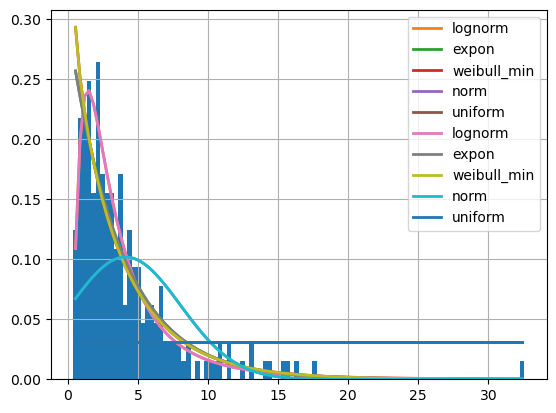

In [108]:

for col in df.columns:
    if col == 'index':
        continue
    print(f"Analyzing column: {col}")
    data = df[col].dropna()

    # Fit distributions
    f = Fitter(data, distributions=['norm', 'expon', 'weibull_min', 'uniform', 'lognorm' ])
    f.fit()
    
    # Print the best fit
    print(f.summary())
    best = f.get_best()
    dist = list(best.keys())[0]
    params = best[dist]
    print(f'The best fit distribution for {col} is: {dist}')
    print(f'Parameters: {params}')
    
    # Plot the fitted distributions
    f.plot_pdf()

We assume that the interarrival times follow an exponential distribution.
We will test the hypothesis that the service times for the initial phase,
are uniformly distributed.
We will test the hypothesis that the service times for placing the keyboard and mouse,
follow a normal distribution.
We will test the hypothesis that the service times for assembling the case (aluminum plates),
are exponentially distributed.

Stat the null and alternative hypotheses

H0: The interarrival times follow an exponential distribution

H1: The interarrival times do not follow an exponential distribution

- Find a test statistic
  - Find the empirical pdf (histogram) by specifying the number of equal bins k
  Measure the distance between the empirical pdf (histogram) and expected pdf (histogram)
- Find a rejection region
  If the distance is greater than a pre-specified value reject the null hypothesis
- The distance between the empirical pdf and observed pdf?
- n data points
- Partition the support into k bins
  - If the support is unbounded, we can have $a_0 = -\infty$ or $a_k = \infty$
- Find the expected number of observations ($E_i$) in each bin i and
- the actual number of observations ($O_i$)
- How do we find the expected number of observations in each bin?
  - First find the probability of an observation falling in each bin
  - $p_i = F(a_i) - F(a_{i-1})$
  - $E_i = n*p_i$ (Choose $k, a_i$ so that $E_i \ge 5$)
- Find the observed number of observations in each bin by counting the data
- Test statistic: Normalized square distance between the observed and expected number of observations
  - $D = \sum_{i=1}^{k} (O_i - E_i)^2/E_i$
  - $D \sim \chi^2_{k-1, 1 - \alpha}$
  - Reject H0 if $D > \chi^2_{k-1, 1 - \alpha}$

In [100]:
def chi_square_test(data, cdf, d : int, alpha=0.05):
    n = len(data)
    # Ensure at least 5 elements in each bin
    k = int(np.floor(n/ 5))
    # Determine the bin edges
    bin_edges = np.linspace(min(data), max(data), k + 1)

    # Probability of each bin
    p = np.zeros(k) 
    # Expected number of observations in each bin
    e = np.zeros(k)
    # Observed number of observations in each bin
    o = np.zeros(k) 
    for i in range(k):
        p[i] = cdf(bin_edges[i+1]) - cdf(bin_edges[i])
        e[i] = n*p[i]
        lb = (data >= bin_edges[i])
        ub = (data < bin_edges[i + 1])
        o[i] = np.sum(lb & ub)
    test_statistic = np.sum((o - e)**2/e)
    chi_square = stats.chi2.ppf(1 - alpha, k - d - 1)
    # Display the results
    print(f'Test statistic = {test_statistic:.2f}')
    print(f'Chi-Square = {chi_square:.2f}')
    if test_statistic > chi_square:
        print('Reject H0')
    else:
        print('Do not reject H0')
    return {'D': test_statistic, 'chi_square': chi_square, 'k': k, 'p': p, 'E': e, 'O': o}

In [133]:
# CDF functions
def exponential_cdf(x_, lambda_ : float):
    return 1 - np.exp(-lambda_*x_)

def uniform_cdf(x_, a_ : float, b_ : float):
    return (x_ - a_)/(b_ - a_)

def normal_cdf(x_, mu_ : float, sigma_ : float):
    return stats.norm.cdf(x_, loc=mu_, scale=sigma_)

def lognormal_cdf(x_, mu_, sigma_):
    return stats.lognorm.cdf(x_, s=sigma_, scale=np.exp(mu_))

def weibull_min_cdf(x_, c_ : float, loc_ : float, scale_ : float):
    return 1 - np.exp(-((x_ - loc_)/scale_)**c_)

In [135]:
# Testing the hypothesis that the interarrival times follow an exponential distribution
interarrival_times = df['Interarrival Times']
mean = np.mean(interarrival_times)
# curry the exponential_cdf function with lambda_ = 1/mean
exponential_cdf_ = lambda x : exponential_cdf(x, 1 / mean)

print(f'Testing the hypothesis that the interarrival times \nfollow an exponential distribution mean = {mean:.2f}, i.e. lambda = {1/mean:.2f}')
_ = chi_square_test(interarrival_times, exponential_cdf_, 1)

Testing the hypothesis that the interarrival times 
follow an exponential distribution mean = 6.27, i.e. lambda = 0.16
Test statistic = 32.34
Chi-Square = 53.38
Do not reject H0


In [103]:
# Testing the hypothesis that the service times for the initial phase are uniformly distributed
initial_phase = df['Service Times for Initial Phase']

a = min(initial_phase)
b = max(initial_phase)
initial_phase_uniform_cdf = lambda x: uniform_cdf(x, a, b)

print(f'Testing the hypothesis that the service times for the \ninitial phase are uniformly distributed with a = {a:.2f} and b = {b:.2f}')
_ = chi_square_test(initial_phase, initial_phase_uniform_cdf, 2) 

Testing the hypothesis that the service times for the 
initial phase are uniformly distributed with a = 1.90 and b = 4.02
Test statistic = 39.40
Chi-Square = 52.19
Do not reject H0


In [115]:
# Testing the hypothesis that the service times for placing the keyboard and mouse follow a normal distribution

keyboard_mouse = df['Service Times for Placing Keyboard and Mouse']
mu = np.mean(keyboard_mouse)
sigma = np.std(keyboard_mouse)

normal_cdf_ = lambda x: normal_cdf(x, mu, sigma)

print(f'Testing the hypothesis that the service times for placing the \nkeyboard and mouse follow a normal distribution with μ = {mu:.2f} and σ = {sigma:.2f}')
_ = chi_square_test(keyboard_mouse, normal_cdf_, 2) # reject H0
print(f'{np.min(keyboard_mouse)=}')

Testing the hypothesis that the service times for placing the 
keyboard and mouse follow a normal distribution with μ = 7.16 and σ = 2.74
Test statistic = 161.58
Chi-Square = 52.19
Reject H0
np.min(keyboard_mouse)=2.42948


In [131]:
# Fitting the Weibull distribution to the data
shape, loc, scale = stats.weibull_min.fit(keyboard_mouse)
print(f'Estimated Weibull parameters: shape = {shape:.2f}, loc = {loc:.2f}, scale = {scale:.2f}')
weibull_cdf_ = lambda x: weibull_min_cdf(x, shape, loc, scale)
print(f'Testing the hypothesis that the service times for placing the \nkeyboard and mouse follow a Weibull distribution with {loc=:.2f} shape = {shape:.2f} and scale = {scale:.2f}')
kbm_weibull_chi_square_results = chi_square_test(keyboard_mouse, weibull_cdf_, 3) # reject H0

n = len(keyboard_mouse)
# print(keyboard_mouse.values[0])
lambda_hat = (1 / n * sum(((keyboard_mouse.values[i] - loc)) ** shape for i in range(n))) ** (1 / shape)
print(f'lambda_hat = {lambda_hat:.5f}')

Estimated Weibull parameters: shape = 1.85, loc = 2.28, scale = 5.49
Testing the hypothesis that the service times for placing the 
keyboard and mouse follow a Weibull distribution with loc=2.28 shape = 1.85 and scale = 5.49
Test statistic = 32.76
Chi-Square = 51.00
Do not reject H0
lambda_hat = 5.48735


In [134]:

# manually calculate the parameters
mean = np.mean(keyboard_mouse)
s2 = np.var(keyboard_mouse)
mu_hat = np.log(mean**2 / np.sqrt(s2 + mean**2))
sigma_hat = np.sqrt(np.log(1 + s2 / mean**2))
print(f'Estimated lognormal parameters: mu_hat = {mu_hat:.2f}, sigma_hat = {sigma_hat:.2f}')

lognormal_cdf_ = lambda x: lognormal_cdf(x, mu_hat, sigma_hat)
print(f'Testing the hypothesis that the service times for placing the \nkeyboard and mouse follow a lognormal distribution with {mu_hat=:.2f} and {sigma_hat=:.2f}')
kbm_lognormal_chi_square_results = chi_square_test(keyboard_mouse, lognormal_cdf_, 2) # 

Estimated lognormal parameters: mu_hat = 1.90, sigma_hat = 0.37
Testing the hypothesis that the service times for placing the 
keyboard and mouse follow a lognormal distribution with mu_hat=1.90 and sigma_hat=0.37
Test statistic = 30.06
Chi-Square = 52.19
Do not reject H0


2025-03-29 20:30:47.400 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted norm distribution with error=0.196476)
2025-03-29 20:30:47.404 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted lognorm distribution with error=0.169915)
2025-03-29 20:30:47.413 | INFO     | fitter.fitter:_fit_single_distribution:333 - Fitted weibull_min distribution with error=0.175136)


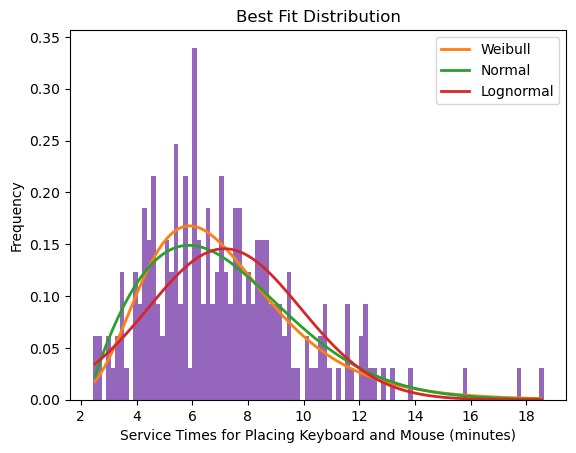

             sumsquare_error         aic         bic  kl_div  ks_statistic  \
lognorm             0.169915  723.805862  733.700814     inf      0.026358   
weibull_min         0.175136  733.950931  743.845883     inf      0.039305   
norm                0.196476  832.650094  839.246729     inf      0.070240   

             ks_pvalue  
lognorm       0.998501  
weibull_min   0.904651  
norm          0.264619  


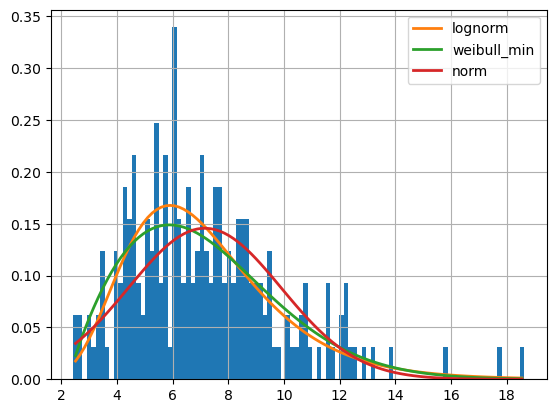

In [111]:
distributions = ['norm', 'weibull_min', 'lognorm']
f = Fitter(keyboard_mouse, distributions=distributions)
f.fit()
f.summary()
f.hist()
plt.title('Best Fit Distribution')
plt.xlabel('Service Times for Placing Keyboard and Mouse (minutes)')
plt.ylabel('Frequency')
plt.legend(['Weibull', 'Normal', 'Lognormal'])
plt.grid(False)
plt.savefig('../Report/Figures/Distribution Analysis/keyboard_mouse_best_fit_distribution.png')
plt.show()
print(f.summary())

In [136]:
# Testing the hypothesis that the service times for assembling the case (aluminum plates) are exponentially distributed

assembling_case = df['Service Times for Assembling the Case (Aluminum Plates)']
mean = np.mean(assembling_case)

exponential_cdf_ = lambda x : exponential_cdf(x, 1 / mean)

print(f'Testing the hypothesis that the service times for assembling the \ncase (aluminum plates) are exponentially distributed with mean = {mean:.2f}, i.e. lambda = {1/mean:.2f}')
_ = chi_square_test(assembling_case, exponential_cdf_, 1)

Testing the hypothesis that the service times for assembling the 
case (aluminum plates) are exponentially distributed with mean = 4.12, i.e. lambda = 0.24
Test statistic = 24.17
Chi-Square = 53.38
Do not reject H0
